In [111]:
import warnings
warnings.filterwarnings('ignore')

## Data Collection:

### Create a Reddit account and obtain an API key from the Reddit developers website. 

    - Guide: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
    ```
    aita_scraper
    personal use script
    IWIpcVW6M46SinijQ6luYQ

    secret	2Me9Tv0UurVRZoFxtOtRYMWUChd9kw
    ```

In [ ]:
# Install PRAW using pip:
# !pip install praw

In [5]:
# This block of code shows how the raw data was collected. Raw data is uploaded onto github and can be accessed in the later code blocks.

# # Import the PRAW library and create a Reddit instance:
# import praw
# import pandas as pd


# # note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
# reddit = praw.Reddit(client_id='IWIpcVW6M46SinijQ6luYQ',
#                      client_secret='2Me9Tv0UurVRZoFxtOtRYMWUChd9kw',
#                      user_agent='aita_scraper')

# # Define the subreddit to scrape:
# subreddit = reddit.subreddit("AmItheAsshole")

# # Labels to scrape
# labels = ["Asshole", "Not the A-hole", "Everyone Sucks", "No A-holes Here", "Not Enough Info"]

# # Number of posts to scrape for each label
# num_posts = 1000

# # Initialize an empty list to store the data
# data = []

# # Scrape the data for each label
# for label in labels:
#     posts = subreddit.search(f"flair:'{label}'", limit=num_posts)
#     for post in posts:
#         data.append([post.title, post.selftext, post.link_flair_text])

# # Create a Pandas DataFrame from the data
# df = pd.DataFrame(data, columns=["Title", "Text", "Label"])

# # Save the DataFrame to a CSV file
# df.to_csv("data/aita_data.csv", index=False)


In [11]:
# df["Label"].value_counts()

Not the A-hole     455
Asshole            243
Everyone Sucks     218
No A-holes here    155
Not enough info     27
Name: Label, dtype: int64

# Data Pre-processing:

In [12]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the DataFrame from the CSV file
df = pd.read_csv("data/aita_data.csv")

# Define the pre-processing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    text = " ".join(tokens)
    
    return text

# Preprocess the "Title" column
df["Title"] = df["Title"].apply(preprocess_text)

# Preprocess the "Text" column
df["Text"] = df["Text"].apply(preprocess_text)

# Save the preprocessed DataFrame to a CSV file in the data folder
df.to_csv("data/aita_data_preprocessed.csv", index=False)


In [13]:
df

,Title,Text,Label
0,aita falsely accusing veteran stolen valor cou...,34m served captain marine corp left service ri...,Asshole
1,aita eating topping bfs pizza,earlier tonight ordered hawaiian pizza boyfrie...,Asshole
2,aita telling girlfriend told one male friend t...,girlfriend together year girlfriend guy friend...,Asshole
3,aita blowing husband sharing pic daughter birt...,eversince brother passed away age 17 birthday ...,Asshole
4,aita allowing son go school dance,husband 51m 48f 6 child 19m 16f 14f 13m 11m 5f...,Asshole
...,...,...,...
1093,aita refusing pay friend boyfriend freelance j...,first apologize mistake first language isnt en...,Not the A-hole
1094,aita sister want pay rent,hi sister 25f 25m rent place 1800month lower m...,Not the A-hole
1095,aita putting mom beneficiary,tend pretty blunt probably ’ handle great need...,Not the A-hole
1096,aita telling stepdad cant make dad joke he dad,16m dad passed away 3 honestly dont remember d...,Not the A-hole


# Feature Extraction

## The method

Word embeddings are a popular and powerful method for representing text data in Natural Language Processing (NLP) tasks. However, before deciding on a feature extraction method, it is important to consider the strengths and weaknesses of each option. Here is a comparison of some of the most common methods for feature extraction in NLP:

- Bag-of-words (BoW): This method represents text data as a collection of words, ignoring the order and context of the words. BoW is a simple and effective method that can be used for a variety of NLP tasks, but it may result in high-dimensional and sparse feature matrices.

- TF-IDF (Term Frequency-Inverse Document Frequency): This method is similar to BoW, but it also weights the importance of each word based on its frequency in the document and its rarity in the corpus. TF-IDF can be used for a variety of NLP tasks and can address some of the drawbacks of BoW, but it still ignores the order and context of the words.

- Word embeddings: This method represents words as vectors in a high-dimensional space, capturing the semantic and syntactic relationships between words in the text. Word embeddings can be trained on large amounts of unlabeled data and used for a variety of NLP tasks, such as text classification, sentiment analysis, and machine translation. However, they may be computationally expensive to train on large amounts of data and may not perform well on rare or out-of-vocabulary words.

- Character-level features: This method represents text data as a collection of character n-grams or character embeddings, capturing the subword-level features of the text. Character-level features can be useful for tasks such as text classification, named entity recognition, and language modeling, but they may not capture the semantic relationships between words.

- Syntax-based features: This method represents text data as a collection of syntactic features, such as parse trees or dependency trees, capturing the syntactic structure of the text. Syntax-based features can be useful for tasks such as text classification, named entity recognition, and relation extraction, but they may be computationally expensive to generate and may not capture the semantic relationships between words.

- Topic models: This method represents text data as a collection of latent topics, capturing the underlying themes or concepts in the text. Topic models can be useful for tasks such as text classification, clustering, and information retrieval, but they may be difficult to interpret and may not capture the semantic relationships between words.

Based on the characteristics of the "Am I the Asshole" dataset and the AITA classification task, word embeddings may be the most appropriate method for feature extraction. Word embeddings can capture the semantic relationships between words, which may be important for distinguishing between different labels in the dataset. 

## Why Word2Vec?

Word2Vec is a popular and effective method for learning word embeddings in NLP, and it can be justified for use in the "Am I the Asshole" classification task for several reasons:

- Captures semantic relationships between words: Word2Vec can capture the semantic relationships between words in the text, which can be important for distinguishing between different labels in the dataset. For example, the words "helpful" and "kind" may have similar embeddings, while the word "rude" may have a dissimilar embedding. This can help the machine learning algorithm to learn more accurate representations of the text data.

- Requires less data than other methods: Word2Vec requires less data than other methods for learning word embeddings, such as GloVe or ELMo. This is because Word2Vec learns embeddings based on the context in which each word appears, rather than trying to capture the global statistics of the corpus. This can be useful for the "Am I the Asshole" dataset, which has a moderate amount of labeled data.

- Handles rare and out-of-vocabulary words: Word2Vec can handle rare and out-of-vocabulary words better than other methods, by inferring the embeddings of these words based on their context in the text. This can be useful for the "Am I the Asshole" dataset, which may contain some rare or unusual words.

- Fast and efficient: Word2Vec is a fast and efficient method for learning word embeddings, which can be trained on large amounts of data in a relatively short amount of time. This can be useful for NLP tasks that require quick and efficient processing of large amounts of text data.

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader as api
from gensim.models import Word2Vec

# Load the preprocessed DataFrame from the CSV file
df = pd.read_csv("data/aita_data_preprocessed.csv")

# Combine the "Title" and "Text" columns into a single column
df["Text"] = df["Title"] + " " + df["Text"]

# Load pre-trained word embeddings
# takes a long time to download
wv = api.load('word2vec-google-news-300')


In [18]:
def text_to_embeddings(text):
    # Split the text into individual words
    words = text.split()
    
    # Convert each word to an embedding
    embeddings = []
    for word in words:
        if word in wv.vocab:
            embeddings.append(wv[word])
    
    # Average the embeddings to get a fixed-size representation of the text
    if len(embeddings) > 0:
        text_embedding = np.mean(embeddings, axis=0)
    else:
        text_embedding = np.zeros(300)
    
    return text_embedding


In [44]:
# Convert the text data to embeddings
embeddings = df["Text"].apply(text_to_embeddings)

# Save the embeddings to a file in the data folder
# np.save("data/aita_embeddings.npy", embeddings)

In [45]:
embeddings

0       [0.036668036, 0.048379045, 0.032588307, 0.0598...
1       [-0.009437913, 0.043052793, 0.044295795, 0.145...
2       [0.054365616, 0.012620689, 0.020719653, 0.0760...
3       [0.02190954, 0.017978929, 0.029297741, 0.06720...
4       [0.030222725, 0.020051446, 0.041965194, 0.0578...
                              ...                        
1093    [0.027895646, 0.034220487, 0.023523357, 0.0691...
1094    [0.009558974, -0.0023856985, -0.013486928, 0.0...
1095    [0.031532258, 0.0129923625, 0.0016342417, 0.08...
1096    [0.067629464, 0.014466877, 0.022834077, 0.1136...
1097    [0.050527886, 0.026090296, 0.012216735, 0.0312...
Name: Text, Length: 1098, dtype: object

# Model training - Embeddings

<AxesSubplot: ylabel='Label'>

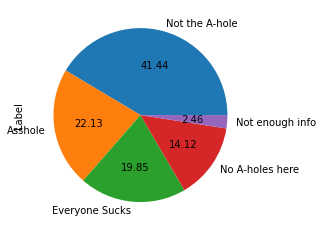

In [26]:
df["Label"].value_counts().plot.pie(autopct="%.2f")

                 precision    recall  f1-score   support

        Asshole       0.41      0.54      0.46        48
 Everyone Sucks       0.30      0.33      0.31        42
No A-holes here       0.44      0.71      0.54        35
Not enough info       0.00      0.00      0.00         4
 Not the A-hole       0.71      0.24      0.36        91

       accuracy                           0.40       220
      macro avg       0.37      0.37      0.34       220
   weighted avg       0.51      0.40      0.40       220



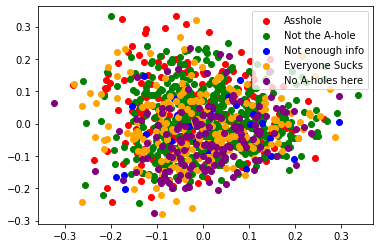

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert the text data to embeddings and save as a DataFrame
embeddings_df = df["Text"].apply(text_to_embeddings).apply(pd.Series)
embeddings_df.to_csv("data/aita_embeddings.csv", index=False)

# Load the embeddings DataFrame from the data folder
embeddings_df = pd.read_csv("data/aita_embeddings.csv")

# Split the data into training and testing sets
X = embeddings_df.values
y = df["Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the resampled data
clf = LogisticRegression(class_weight='balanced', max_iter=10000)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Reduce the dimensionality of the embeddings to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(X)

# Create a scatter plot of the embeddings with labels
labels = df["Label"].unique()
colors = ["red", "green", "blue", "orange", "purple"]
for label, color in zip(labels, colors):
    mask = df["Label"] == label
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], c=color, label=label)
plt.legend()
plt.show()

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier on the resampled data
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

        Asshole       0.18      0.19      0.18        48
 Everyone Sucks       0.15      0.17      0.16        42
No A-holes here       0.26      0.26      0.26        35
Not enough info       0.09      0.25      0.13         4
 Not the A-hole       0.38      0.32      0.35        91

       accuracy                           0.25       220
      macro avg       0.21      0.24      0.22       220
   weighted avg       0.27      0.25      0.26       220



In [87]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier on the resampled data
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

        Asshole       0.40      0.33      0.36        48
 Everyone Sucks       0.19      0.12      0.14        42
No A-holes here       0.42      0.40      0.41        35
Not enough info       0.00      0.00      0.00         4
 Not the A-hole       0.47      0.62      0.53        91

       accuracy                           0.41       220
      macro avg       0.30      0.29      0.29       220
   weighted avg       0.38      0.41      0.39       220



In [88]:
from sklearn.svm import SVC

# Train an SVM classifier on the resampled data
clf = SVC(class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

        Asshole       0.39      0.54      0.45        48
 Everyone Sucks       0.26      0.38      0.31        42
No A-holes here       0.51      0.66      0.57        35
Not enough info       0.00      0.00      0.00         4
 Not the A-hole       0.63      0.26      0.37        91

       accuracy                           0.40       220
      macro avg       0.36      0.37      0.34       220
   weighted avg       0.48      0.40      0.40       220



In [89]:
from sklearn.naive_bayes import GaussianNB

# Train a naive Bayes classifier on the resampled data
clf = GaussianNB()
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

        Asshole       0.38      0.42      0.40        48
 Everyone Sucks       0.29      0.29      0.29        42
No A-holes here       0.42      0.60      0.49        35
Not enough info       0.00      0.00      0.00         4
 Not the A-hole       0.53      0.38      0.45        91

       accuracy                           0.40       220
      macro avg       0.33      0.34      0.33       220
   weighted avg       0.43      0.40      0.41       220



In [90]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier on the resampled data
clf = KNeighborsClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

        Asshole       0.36      0.42      0.39        48
 Everyone Sucks       0.13      0.21      0.16        42
No A-holes here       0.34      0.46      0.39        35
Not enough info       0.00      0.00      0.00         4
 Not the A-hole       0.25      0.01      0.02        91

       accuracy                           0.21       220
      macro avg       0.22      0.22      0.19       220
   weighted avg       0.26      0.21      0.19       220



In [143]:
from sklearn.metrics import classification_report
import pandas as pd

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train_resampled, y_train_resampled)
    # Make predictions on test set
    y_pred = model.predict(X_test)
    # Calculate classification report metrics
    metrics = classification_report(y_test, y_pred, output_dict=True)
    # Add model name to metrics dictionary
    metrics["Model"] = name
    # Append metrics to results list
    results.append(metrics)

# Convert results to pandas DataFrame
df_results = pd.DataFrame(results)
df_results


,Asshole,Everyone Sucks,No A-holes here,Not enough info,Not the A-hole,accuracy,macro avg,weighted avg,Model
0,"{'precision': 0.40625, 'recall': 0.54166666666...","{'precision': 0.2978723404255319, 'recall': 0....","{'precision': 0.43859649122807015, 'recall': 0...","{'precision': 0.0, 'recall': 0.0, 'f1-score': ...","{'precision': 0.7096774193548387, 'recall': 0....",0.395455,"{'precision': 0.37047925020168815, 'recall': 0...","{'precision': 0.508828002964296, 'recall': 0.3...",Logistic Regression
1,"{'precision': 0.18, 'recall': 0.1875, 'f1-scor...","{'precision': 0.14583333333333334, 'recall': 0...","{'precision': 0.2647058823529412, 'recall': 0....","{'precision': 0.09090909090909091, 'recall': 0...","{'precision': 0.37662337662337664, 'recall': 0...",0.250000,"{'precision': 0.2116143366437484, 'recall': 0....","{'precision': 0.26666395235780266, 'recall': 0...",Decision Tree
2,"{'precision': 0.4, 'recall': 0.333333333333333...","{'precision': 0.18518518518518517, 'recall': 0...","{'precision': 0.42424242424242425, 'recall': 0...","{'precision': 0.0, 'recall': 0.0, 'f1-score': ...","{'precision': 0.47058823529411764, 'recall': 0...",0.413636,"{'precision': 0.2960031689443454, 'recall': 0....","{'precision': 0.3847717819910333, 'recall': 0....",Random Forest
3,"{'precision': 0.3880597014925373, 'recall': 0....","{'precision': 0.25806451612903225, 'recall': 0...","{'precision': 0.5111111111111111, 'recall': 0....","{'precision': 0.0, 'recall': 0.0, 'f1-score': ...","{'precision': 0.631578947368421, 'recall': 0.2...",0.404545,"{'precision': 0.35776285522022033, 'recall': 0...","{'precision': 0.4764915838567107, 'recall': 0....",SVM
4,"{'precision': 0.38461538461538464, 'recall': 0...","{'precision': 0.2926829268292683, 'recall': 0....","{'precision': 0.42, 'recall': 0.6, 'f1-score':...","{'precision': 0.0, 'recall': 0.0, 'f1-score': ...","{'precision': 0.5303030303030303, 'recall': 0....",0.400000,"{'precision': 0.3255202683495366, 'recall': 0....","{'precision': 0.4259627142997431, 'recall': 0....",Naive Bayes
5,"{'precision': 0.36363636363636365, 'recall': 0...","{'precision': 0.1323529411764706, 'recall': 0....","{'precision': 0.3404255319148936, 'recall': 0....","{'precision': 0.0, 'recall': 0.0, 'f1-score': ...","{'precision': 0.25, 'recall': 0.01098901098901...",0.209091,"{'precision': 0.21728296734554556, 'recall': 0...","{'precision': 0.2621739209135386, 'recall': 0....",KNN


# Evaluation

The models' performance is rather low, with the best performing model (in terms of accuracy) being Random Forest Classifier (41%) closely followed by SVM (41%), Naive Bayes (40%). The wors performing is KNN. 

The poor overall performance could be attributed to several factors:

1. Pre-trained word embeddings are too different from the data at hand. The former was trained on news articles, while the latter on user-posted texts. 
2. SMOTE algorithm is not helping with the class imbalance. It could be noted that there are way too many classes (5), with one of them having only 2 instances. 

This problems will now be dealt as follows. 

1. Instead of using word embeddings, TF-IDF would be used.
2. Class imbalance issue is mitigated by restriciting target values to 1 or 0 indicating if the user is an "Asshole". This is done by coding both Asshole and Everyone Sucks labels as 1 for Asshole. This results in 461 (0) vs 637 (1) instances and target labels respectively. 

<AxesSubplot: ylabel='Asshole'>

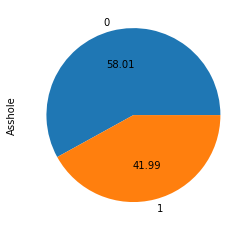

In [218]:
df['Asshole'] = df['Label'].apply(lambda x: 1 if x in ['Asshole', 'Everyone Sucks'] else 0)
df["Asshole"].value_counts().plot.pie(autopct="%.2f")

# Model training - TF-IDF

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer(max_features=5000)

# Generate the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['Text'])

# Create a new dataframe with TF-IDF vectors and labels
df_tfidf = pd.DataFrame(tfidf_matrix.toarray())
df_tfidf['Asshole'] = df['Asshole']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_tfidf.drop('Asshole', axis=1), df_tfidf['Asshole'], test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB().fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_y_pred, target_names=['Not the A-hole', 'Asshole'])
print("Naive Bayes Classification Report:\n", nb_report)

# SVM tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the range of hyperparameters to explore
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1]}

# Create an SVM object
svc = SVC()

# Create a GridSearchCV object
svc_grid = GridSearchCV(svc, param_grid, scoring='f1', cv=5)

# Fit the GridSearchCV object to the data
svc_grid.fit(X_train, y_train)

# Get the best hyperparameters
print("SVC parameters:", svc_grid.best_params_)

# SVM model
svm_model = SVC(kernel='linear', C=svc_grid.best_params_['C'], gamma=svc_grid.best_params_['gamma']).fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_y_pred, target_names=['Not the A-hole', 'Asshole'])
print("SVM Classification Report:\n", svm_report)

# Logistic Regression model
lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_report = classification_report(y_test, lr_y_pred, target_names=['Not the A-hole', 'Asshole'])
print("Logistic Regression Classification Report:\n", lr_report)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred, target_names=['Not the A-hole', 'Asshole'])
print("Random Forest Classification Report:\n", rf_report)

# Decision Tree max_depth Tuning
from sklearn.model_selection import cross_val_score

max_depth_values = range(1, 21)
mean_f1_scores = []

for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    f1_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='f1_macro')
    mean_f1_score = f1_scores.mean()
    mean_f1_scores.append(mean_f1_score)

# Find the max F1-score and corresponding max depth value
best_mean_f1_score = max(mean_f1_scores)
best_max_depth = max_depth_values[mean_f1_scores.index(best_mean_f1_score)]

print("Best DTC max depth:", best_max_depth)
print("Best DTC mean F1-score:", best_mean_f1_score)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth).fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_report = classification_report(y_test, dt_y_pred, target_names=['Not the A-hole', 'Asshole'])
print("Decision Tree Classification Report:\n", dt_report)

# KNN classifier tuning
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 21)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train, y_train)

print("Best KNN n_neighbors", grid_search.best_params_)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors']).fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test, knn_y_pred, target_names=['Not the A-hole', 'Asshole'])
print("KNN Classification Report:\n", knn_report)

Naive Bayes Classification Report:
                 precision    recall  f1-score   support

Not the A-hole       0.61      1.00      0.76       130
       Asshole       1.00      0.07      0.12        90

      accuracy                           0.62       220
     macro avg       0.80      0.53      0.44       220
  weighted avg       0.77      0.62      0.50       220

SVC parameters: {'C': 100, 'gamma': 0.01}
SVM Classification Report:
                 precision    recall  f1-score   support

Not the A-hole       0.75      0.82      0.78       130
       Asshole       0.70      0.60      0.65        90

      accuracy                           0.73       220
     macro avg       0.72      0.71      0.72       220
  weighted avg       0.73      0.73      0.73       220

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

Not the A-hole       0.67      0.95      0.79       130
       Asshole       0.81      0.33      0.47        90

  

# Evaluation

In [221]:
import pandas as pd

# Extract f1-score from classification reports
nb_f1 = nb_report.split()[-2]
svm_f1 = svm_report.split()[-2]
lr_f1 = lr_report.split()[-2]
rf_f1 = rf_report.split()[-2]
dt_f1 = dt_report.split()[-2]
knn_f1 = knn_report.split()[-2]

# Create a dictionary of f1-score values
f1_scores = {
    'Model': ['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN'],
    'f1-score': [nb_f1, svm_f1, lr_f1, rf_f1, dt_f1, knn_f1]
}

# Create a DataFrame from the f1-score dictionary
f1_df = pd.DataFrame.from_dict(f1_scores)
f1_df = f1_df.sort_values('f1-score', ascending=False)

# Print the DataFrame
print(f1_df)


                 Model f1-score
4        Decision Tree     0.90
3        Random Forest     0.81
1                  SVM     0.73
2  Logistic Regression     0.66
5                  KNN     0.58
0          Naive Bayes     0.50


F1-score is a commonly used metric for evaluating binary classification models that takes into account both precision and recall. Precision measures how many of the predicted positive cases were actually positive, while recall measures how many of the actual positive cases were correctly identified. The F1-score combines these two metrics into a single score, which is useful when the cost of false positives and false negatives is roughly equal.

F1-score is a good metric to use for evaluation when the dataset is imbalanced, meaning that one class has much fewer examples than the other. In such cases, accuracy can be a misleading metric, as a model that always predicts the majority class will have high accuracy but may not be very useful. F1-score, on the other hand, considers both precision and recall and is less affected by class imbalance. Therefore, it is a good choice for evaluating models in this case.

The ranking of the f1-scores of models can be seen above. 

In [242]:
from typing import Union

def predict_label(model: str, sentence: str) -> None:
    """
    Predicts the label of a given sentence using the specified model.
    
    Parameters:
    model (str): The name of the model to use for prediction. Only 'svm', 'lr', 'rf', 'dt', 'nb', and 'knn' are allowed.
    sentence (str): The sentence to predict the label for.
    
    Returns:
    None: The predicted label is printed to the console.
    """
    # Check if model is valid
    if model not in ["svm", "lr", "rf", "dt", "knn", "nb"]:
        raise ValueError("Invalid model name")

    # Check if sentence is a string
    if not isinstance(sentence, str):
        raise TypeError("Sentence must be a string")
    # Transform the new sentence using the TF-IDF vectorizer
    sentence_tfidf = tfidf.transform([sentence])

    # Get the predicted probabilities for each class
    if model == 'svm':
        class_probabilities = svm_model.predict_proba(sentence_tfidf)[0]
    elif model == 'lr':
        class_probabilities = lr_model.predict_proba(sentence_tfidf)[0]
    elif model == 'rf':
        class_probabilities = rf_model.predict_proba(sentence_tfidf)[0]
    elif model == 'dt':
        class_probabilities = dt_model.predict_proba(sentence_tfidf)[0]
    elif model == 'knn':
        class_probabilities = knn_model.predict_proba(sentence_tfidf)[0]

    not_asshole_prob = round(class_probabilities[0]*100)
    asshole_prob = round(class_probabilities[1]*100)

    # Get the predicted label
    if model == 'svm':
        predicted_label = svm_model.predict(sentence_tfidf)[0]
    elif model == 'lr':
        predicted_label = lr_model.predict(sentence_tfidf)[0]
    elif model == 'rf':
        predicted_label = rf_model.predict(sentence_tfidf)[0]
    elif model == 'dt':
        predicted_label = dt_model.predict(sentence_tfidf)[0]
    elif model == 'knn':
        predicted_label = knn_model.predict(sentence_tfidf)[0]
    
    # Print the results
    if predicted_label == 1:
        print("You are an asshole with probability {}%, and not an asshole with probability {}%.".format(asshole_prob, not_asshole_prob))
    else:
        print("You are not an asshole with probability {}%, and an asshole with probability {}%.".format(not_asshole_prob, asshole_prob))


# Deployment

In [254]:
# Example sentence
new_sentence = "WIBTA I I made my 10yr old sister use her birthday money to pay me back I (24f) recently moved back in with my parents so I could finish trade school. My little sister (10) and I share a jack and Jill bathroom, I had been noticing slime and spilled wax all over the counter tops and and light switch in my side of the bathroom and had talked to my parents about keeping my little sister out of my side of the bathroom.Well 2 weeks ago I was supposed to go on a date but couldn’t find any of my makeup, I asked my little sister if she had taken it out of my bathroom and her response was “I didn’t even know you wore makeup”. She’s a good kid so I believed her and figured I must have lost my makeup in the move which pissed me off because I buy expensive stuff since I don’t use it too often. I ended up going to the store that day and just replacing the concealer/foundation (100$) since I couldn’t afford to replace my whole set.Well this morning I wake up to find my old concealer/foundation sitting right on top of the new ones I just bought. I asked my mom if she had found it somewhere and she said she never touched it. It was pretty obvious that it had leaked or something because there was makeup all on the outside of the bottle and it was way more empty than when I last had it. My mom immediately thinks that my little sister took it and goes into her room to snoop around.The next think I know my mom starts tossing the room and I’m trying to get her to stop when she finally dumps out a drawer with not only my makeup but a bunch of makeup of my moms that had gone missing. My sister had taken 2 makeup pallets of mine, 1 I hadn’t even opened yet, brushes, lipstick, eye liner, basically everything. On top of that my mom found open containers of slime and paint that had seeped into the carpet and other shit she had stolen from around the house.All of the makeup she took from my mom and I were destroyed, the pallets were mixed together and cracked, brushes had paint in them, lipstick mashed, and everything was covered in slime. When me and my parents confronted her she denied everything, even said that she didn’t use any of the makeup when it was an obvious lie.My parents have grounded her for month (no phone, no electronics) and have offered to pay me back but I don’t want them to pay me back I want HER to pay me back. She stole and destroyed nearly 200$ in makeup and lied to my face about it, the worst part is I’ve only been living here for 3 weeks! Her 11th birthday is coming up in 2 months and I’m wondering if i would be the asshole if I made her use her birthday money to pay me back? I feel like taking her birthday money is cruel especially because it’s the only kind of spending money she gets all year and my parents have suggested chores but what chores is she gonna do for me to pay me back? I do more chores than her and I pay rent! TLDR: 10yr old sister stole and destroyed 200$ worth of makeup from me, WIBTA if I made her pay me back with her birthday money?"
new_sentence1= "AITA for hiding vegetables in my boyfriend’s food? throwaway bc he spends a lot of time on reddit. this is the most ridiculous argument i’ve had with a grown man. I (28f) have been with my boyfriend (36f) for a year and we moved in together about 4 months ago. One of the first things I noticed about my boyfriend was that he never really ate vegetables. He would sometimes eat them if we were out at a restaurant and they came as part of his meal. But he never ate them when I cooked for him. Originally I thought that maybe my cooking was the problem so I asked him if he enjoyed my food and he told me he loves my cooking. On nights I didn’t cook for him, he ate exclusively frozen foods and never ate the vegetables in those either. Naturally, he has some health issues. Vitamin deficiencies etc. he had phrased it to me as if he was somehow just genetically unlucky. I believed it for a while bc idk how that stuff works but eventually it became clear to me it’s because he voluntarily eats a vegetable like once a month. 6 months ago I started hiding vegetables in my cooking. If I was making pasta I’d put the vegetables in I’d usually put in for myself, then take half out and blend it so he wouldn’t notice the vegetable chunks and then tell him I’d just scooped the veg out of his portion. This happens more often now we live together because I do all of the cooking. He’s been telling me a lot lately he’s been feeling a lot better the past few months and has even had his doctor reduce the dosage of some of his medications and he hasn’t had to take his multivitamin in weeks. I kept my mouth shut because I’m just glad he’s feeling better and it really does me no harm to hide the veg in his food. Yesterday, I was making one of our regular pasta meals (it’s one that’s very easy to hide at least 4 veggies in) and i was about to blend my boyfriend’s portion when the blender died mid-blend. I had to serve it in all its veg chunk glory. My boyfriend refused to eat the vegetables but when he tasted the sauce he said it’s weird how it tastes the exact same even though this one has veg in it. So, I confessed. He screamed at me and called me a controlling bitch and said that it’s none of my business if he thinks vegetables don’t do anything. I pointed out he said he felt better. He said his health was none of my business and that I’m a controlling, judgey AH and stormed out of our apartment to stay with his sister. His sister texted me to say he’s fine but she agrees with. him. My friends agree it’s ridiculos that he didn’t eat veg but agree I’m being an AH. AITA?"

predict_label(model = 'dt', sentence=new_sentence)
predict_label(model = 'rf', sentence=new_sentence)

predict_label(model = 'dt', sentence=new_sentence1)
predict_label(model = 'rf', sentence=new_sentence1)

You are an asshole with probability 87%, and not an asshole with probability 13%.
You are not an asshole with probability 50%, and an asshole with probability 50%.
You are an asshole with probability 87%, and not an asshole with probability 13%.
You are an asshole with probability 61%, and not an asshole with probability 39%.


# Future imporvements

1. There seems to be an overfitting in the Decision Tree Classifier, since it is giving the same prediction for different inputs. 
    - Revisiting parameters such as `max_depth` and `max_leaf_nodes` can be readjusted and re-evaluated.
2. SVM is deployable at the moment
    - Further investigation is needed in this matter.
3. Researching better pre-trained word embeddings could address the poor performance of the first models. 

# References

1. ChatGPT was used from time to time to catch some errors or to explain them. 
2. Reddit data-scraping tutorial https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c.